In [1]:
import torchvision as tv
import phototour
import torch
from tqdm import tqdm 
import numpy as np
import torch.nn as nn
import math 
import tfeat_model
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import os

#init tfeat and load the trained weights
tfeat = tfeat_model.TNet()
models_path = 'pretrained-models'
net_name = 'tfeat-liberty'
tfeat.load_state_dict(torch.load(os.path.join(models_path,net_name+".params")))
tfeat.cuda()
tfeat.eval()

TNet(
  (features): Sequential(
    (0): InstanceNorm2d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (1): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
    (2): Tanh()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(6, 6), stride=(1, 1))
    (5): Tanh()
  )
  (descr): Sequential(
    (0): Linear(in_features=4096, out_features=128, bias=True)
    (1): Tanh()
  )
)

In [2]:
import torchvision as tv
import phototour
import torch
from tqdm import tqdm 
import numpy as np
import torch.nn as nn
import math 
import tfeat_model
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import os

#init tfeat and load the trained weights
tfeat = tfeat_model.TNet()
models_path = 'pretrained-models'
net_name = 'tfeat-notredame'
tfeat.load_state_dict(torch.load(os.path.join(models_path,net_name+".params")))
tfeat.cuda()
tfeat.eval()

TNet(
  (features): Sequential(
    (0): InstanceNorm2d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (1): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
    (2): Tanh()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(6, 6), stride=(1, 1))
    (5): Tanh()
  )
  (descr): Sequential(
    (0): Linear(in_features=4096, out_features=128, bias=True)
    (1): Tanh()
  )
)

In [3]:
import torchvision as tv
import phototour
import torch
from tqdm import tqdm 
import numpy as np
import torch.nn as nn
import math 
import tfeat_model
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import os

#init tfeat and load the trained weights
tfeat = tfeat_model.TNet()
models_path = 'pretrained-models'
net_name = 'tfeat-yosemite'
tfeat.load_state_dict(torch.load(os.path.join(models_path,net_name+".params")))
tfeat.cuda()
tfeat.eval()

TNet(
  (features): Sequential(
    (0): InstanceNorm2d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (1): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
    (2): Tanh()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(6, 6), stride=(1, 1))
    (5): Tanh()
  )
  (descr): Sequential(
    (0): Linear(in_features=4096, out_features=128, bias=True)
    (1): Tanh()
  )
)

# Runing `tfeat` with `openCV` for image matching

Below we show how to use the `openCV` pipeline to match two images using `TFeat`.

<KeyPoint 0x7f10f5be10>
[[180 255 207  96  32   0   0  64 193 198  29 239 120 227 159  47  62 248
  224  33  79 251  18  14 192   0   0 192  24 103  60  97   0   1 152 125
  238 219 239  20 134  24 155  57  25 167   3   0 200 100  48   0   0   0
   70 252 159  69   0 128 126 255 191  63]]


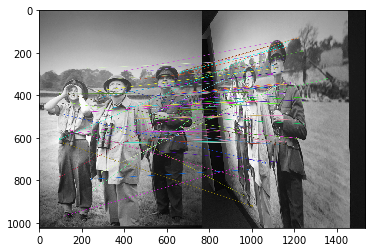

CPU times: user 2.57 s, sys: 36 ms, total: 2.61 s
Wall time: 1.82 s


(<matplotlib.image.AxesImage at 0x7f10e92908>, None)

In [11]:
%%time

import cv2
import tfeat_utils
import numpy as np
import cv2
from matplotlib import pyplot as plt


img1 = cv2.imread('imgs/v_churchill/1.ppm',0) 
img2 = cv2.imread('imgs/v_churchill/6.ppm',0)

brisk = cv2.BRISK_create()
kp1, des1 = brisk.detectAndCompute(img1,None)
print(kp1[0])
print(des1[0:1,])
kp2, des2 = brisk.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])
        
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,0, flags=2)
plt.imshow(img3),plt.show()

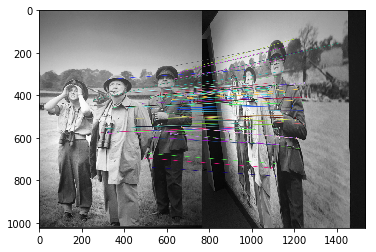

CPU times: user 4.98 s, sys: 560 ms, total: 5.54 s
Wall time: 4.45 s


(<matplotlib.image.AxesImage at 0x7f069bfac8>, None)

In [4]:
%%time

# mag_factor is how many times the original keypoint scale
# is enlarged to generate a patch from a keypoint
mag_factor = 3
desc_tfeat1 = tfeat_utils.describe_opencv(tfeat, img1, kp1, 32,mag_factor)
desc_tfeat2 = tfeat_utils.describe_opencv(tfeat, img2, kp2, 32,mag_factor)

bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(desc_tfeat1,desc_tfeat2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])
        
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,0, flags=2)

plt.imshow(img3),plt.show()

In [7]:
%%time

import cv2
import tfeat_utils
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Opens the Video file
cap= cv2.VideoCapture('/home/nvidia/Downloads/highway.mp4')
img1 = cv2.imread('imgs/v_churchill/1.ppm',0) 

i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('highway/frame'+str(i)+'.jpg',frame)
    img = cv2.imread('highway/frame'+str(i)+'.jpg',0)
    cropped_img = img[0:100, 0:100]
    brisk = cv2.BRISK_create()
    kp, des = brisk.detectAndCompute(cropped_img,None)
    # mag_factor is how many times the original keypoint scale
    # is enlarged to generate a patch from a keypoint
    mag_factor = 3
    desc_tfeat = tfeat_utils.describe_opencv(tfeat, cropped_img, kp, 32,mag_factor)
    print(i)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

ValueError: expected 4D input (got 2D input)

In [ ]:
%%time

import cv2
import tfeat_utils
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Opens the Video file

img = cv2.imread('highway/frame0.jpg',0)
crop_img = img[0:50, 0:50]
brisk = cv2.BRISK_create()
kp, des = brisk.detectAndCompute(crop_img,None)
# mag_factor is how many times the original keypoint scale
# is enlarged to generate a patch from a keypoint
mag_factor = 3
print("Video_Image Start")
desc_tfeat = tfeat_utils.describe_opencv(tfeat, crop_img, kp, 32,mag_factor)
print("Video_Image Start")

In [6]:
import rospy

ImportError: No module named 'rospy'